In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [4]:
test_datagen = ImageDataGenerator()

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=20)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 107ms/step - accuracy: 0.1354 - loss: 3.9878 - val_accuracy: 0.2383 - val_loss: 1.9177
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.2056 - loss: 2.0486 - val_accuracy: 0.2815 - val_loss: 1.8753
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.2549 - loss: 1.9444 - val_accuracy: 0.3752 - val_loss: 1.6849
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.2867 - loss: 1.8813 - val_accuracy: 0.4052 - val_loss: 1.5962
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.3056 - loss: 1.8445 - val_accuracy: 0.4094 - val_loss: 1.5810
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.3253 - loss: 1.8048 - val_accuracy: 0.4531 - val_loss: 1.5265
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.3275 - loss: 1.7985 - val_accuracy: 0.4131 - val_loss: 1.6136
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.3479 - loss: 1.7585 - val

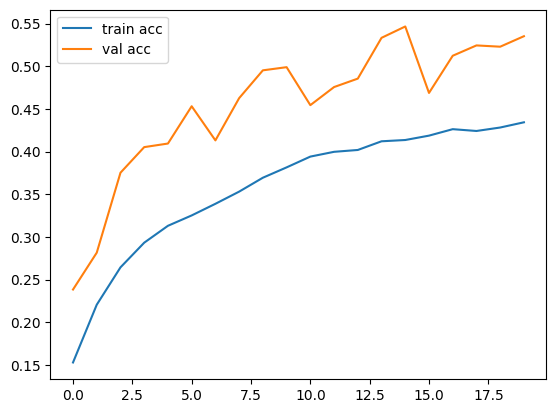

In [8]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5339 - loss: 1.2872
Test Accuracy: 0.54


In [12]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(class_names)   # ensure this ordering is used everywhere


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [16]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0


In [17]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_gen.fit(x_train)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
history = model.fit(
    train_gen.flow(x_train, y_train, batch_size=64),
    epochs=25,
    validation_data=(x_test, y_test)
)


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 168ms/step - accuracy: 0.2638 - loss: 1.9718 - val_accuracy: 0.4826 - val_loss: 1.4204
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 167ms/step - accuracy: 0.4599 - loss: 1.4940 - val_accuracy: 0.5536 - val_loss: 1.2026
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 171ms/step - accuracy: 0.5212 - loss: 1.3339 - val_accuracy: 0.6116 - val_loss: 1.0910
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 174ms/step - accuracy: 0.5591 - loss: 1.2297 - val_accuracy: 0.6570 - val_loss: 0.9876
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 175ms/step - accuracy: 0.5919 - loss: 1.1583 - val_accuracy: 0.6845 - val_loss: 0.9071
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 166ms/step - accuracy: 0.6129 - loss: 1.1013 - val_accuracy: 0.6837 - val_loss: 0.8909
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 171ms/step - accuracy: 0.6310 - loss: 1.0495 - val_accuracy: 0.7016 - val_loss: 0.8502
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 166ms/step - accuracy: 0.6514 -

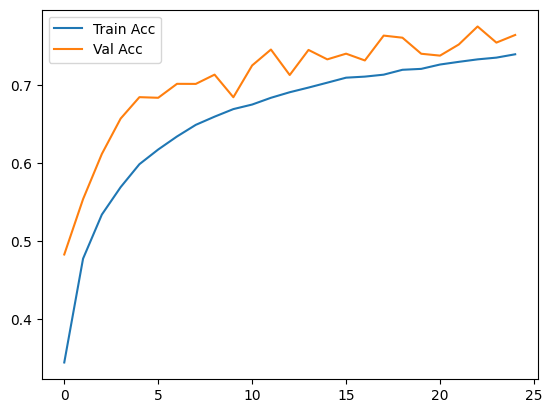

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.show()


In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.3f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7652 - loss: 0.7013
✅ Test Accuracy: 0.764


Saving exp8_test1.png to exp8_test1 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


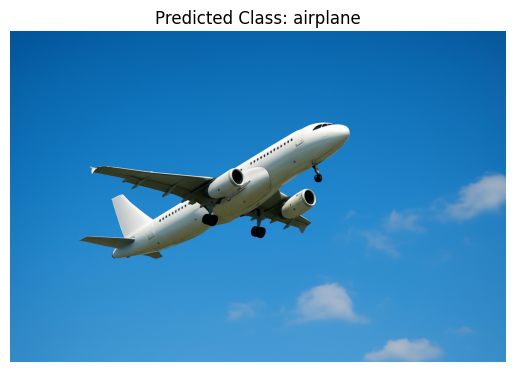

In [24]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Upload an image file interactively
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted Class: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()


Saving exp8_test3.png to exp8_test3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


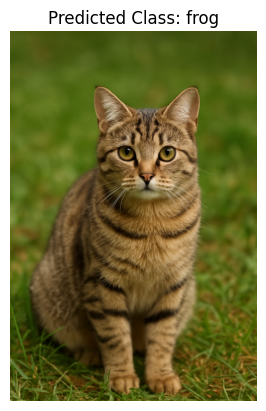

In [26]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Upload an image file interactively
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted Class: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()
